## EDA и подготовка данных
Рассмотрены некоторые моменты предоставленных данных.
Загружал не весь датасет, сразу отбросил большую часть данных о локации, оставил только микрорайоны.
Выделил целевую метку - #### health.


In [3]:
import pandas as pd
import numpy as np

In [4]:
data_path = '2015-street-tree-census-tree-data.csv'
cols = ['tree_id', 'tree_dbh', 'curb_loc', 'health', 'spc_latin', 'spc_common',
        'steward', 'guards', 'sidewalk', 'problems', 'root_stone','root_grate',
        'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light',
        'brch_shoe', 'brch_other', 'nta', 'census tract']

In [5]:
df = pd.read_csv(data_path, usecols=cols)
print('# rows = ', df.shape[0])
df.head(1).T

# rows =  683788


,0
tree_id,180683
tree_dbh,3
curb_loc,OnCurb
health,Fair
spc_latin,Acer rubrum
spc_common,red maple
steward,NaN
guards,NaN
sidewalk,NoDamage
problems,NaN


In [6]:
df.isna().sum()

,0
tree_id,0
tree_dbh,0
curb_loc,0
health,31616
spc_latin,31619
spc_common,31619
steward,519438
guards,603922
sidewalk,31616
problems,457944


In [7]:
df.dropna(subset=['health'], inplace=True)
df.isna().sum()

,0
tree_id,0
tree_dbh,0
curb_loc,0
health,0
spc_latin,5
spc_common,5
steward,487822
guards,572306
sidewalk,1
problems,426328


In [8]:
df.drop(columns=['guards', 'problems', 'steward', 'spc_latin'], inplace=True)
df.shape

(652172, 17)

<Axes: xlabel='health'>

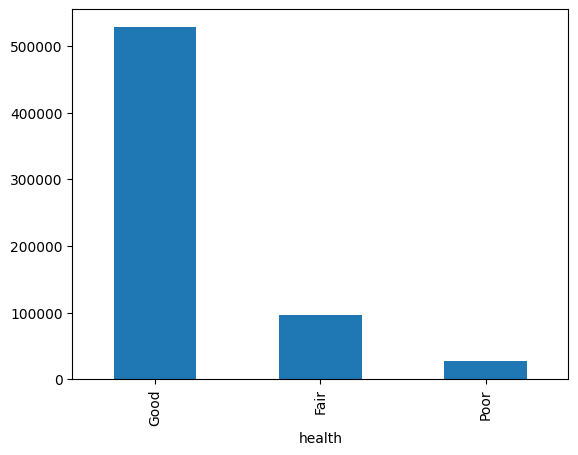

In [9]:
df.health.value_counts().plot.bar()

<Axes: xlabel='tree_dbh'>

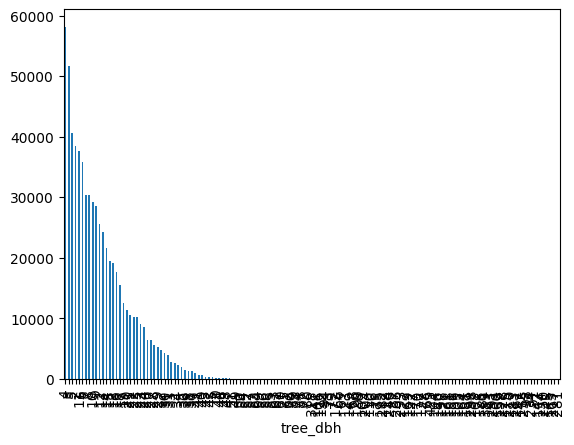

In [10]:
df.tree_dbh.value_counts().plot.bar()

In [11]:
df.tree_dbh[df.tree_dbh > 50].count()

361

In [12]:
df.curb_loc.value_counts()

,count
curb_loc,
OnCurb,626297
OffsetFromCurb,25875


In [13]:
df.sidewalk.value_counts()

,count
sidewalk,
NoDamage,464978
Damage,187193


In [14]:
df.root_stone.value_counts()

,count
root_stone,
No,512173
Yes,139999


In [15]:
df.root_grate.value_counts()

,count
root_grate,
No,648636
Yes,3536


In [16]:
df.root_other.value_counts()

,count
root_other,
No,621850
Yes,30322


In [17]:
df.trunk_wire.value_counts()

,count
trunk_wire,
No,638898
Yes,13274


In [18]:
df.trnk_light.value_counts()

,count
trnk_light,
No,651141
Yes,1031


In [19]:
df.trnk_other.value_counts()

,count
trnk_other,
No,619599
Yes,32573


In [20]:
df.brch_light.value_counts()

,count
brch_light,
No,589807
Yes,62365


In [21]:
df.brch_shoe.value_counts()

,count
brch_shoe,
No,651761
Yes,411


In [22]:
df.brch_other.value_counts()

,count
brch_other,
No,627817
Yes,24355


In [23]:
df.nta.value_counts()

,count
nta,
SI01,12530
SI54,10267
QN46,9386
BK82,9188
SI32,8842
...,...
MN06,865
BX46,773
BK93,671


In [24]:
df['census tract'].value_counts()

,count
census tract,
176.0,3489
20801.0,3466
198.0,3304
138.0,2854
226.0,2648
...,...
8602.0,10
25902.0,9
716.0,4


### Очистка данных

In [25]:
df.spc_common = df.spc_common.fillna('Other')
df.sidewalk = df.sidewalk.fillna('Damage')
df['census tract'] = df['census tract'].fillna(df['census tract'].mode)

### Подготовки тренировочных и тестовых данных

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train, test = train_test_split(df,
                               test_size=0.25,
                               random_state=42)
train.shape

(489129, 17)

In [28]:
train.to_csv('train.csv')
test.to_csv('test.csv')